# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt


## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
raw_megaline_calls = pd.read_csv('megaline_calls.csv')
raw_megaline_internet = pd.read_csv('megaline_internet.csv')
raw_megaline_messages = pd.read_csv('megaline_messages.csv')
raw_megaline_plans = pd.read_csv('megaline_plans.csv')
raw_megaline_users = pd.read_csv('megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [4]:
#Creo una función que me permita imprimir información general de cualquier dataframe que ponga como parámetro
def first_lookup (dataframe):
    print('-----Dataframe information-----')
    display(dataframe.info())
    print('\n-----Statistics-----\n')
    display(dataframe.describe())
    print('\n-----Duplicates-----\n')
    print(dataframe.duplicated().sum())
    print('\n-----Empty values-----\n')
    print(dataframe.isna().sum())
    print('\n-----Head rows-----\n')
    display(dataframe.head(10))    


## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
#Llamo a la función que creé para mostrar información de raw_megaline_plans
first_lookup(raw_megaline_plans)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None


-----Statistics-----



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



-----Duplicates-----

0

-----Empty values-----

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

-----Head rows-----



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
# Imprime una muestra de los datos para las tarifas
#Imprimo la tabla completa porque sólo tiene dos filas
display(raw_megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. La tabla tiene sólo dos filas, cada una corresponde a uno de los planes que ofrece Megaline.
2. No existen valores ausentes en ninguna de las 8 columnas de la tabla.
3. Los datos que muestra la tabla corresponden a las tarifas de los planes de Megaline, y los tipos de datos usados son adecuados para cada columna.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

+ No identifico ningún problema que corregir en esta tabla.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

+ No identifico alguna columna adicional que me pueda ser de utilidad en este momento.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
first_lookup(raw_megaline_users)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


-----Statistics-----



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



-----Duplicates-----

0

-----Empty values-----

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

-----Head rows-----



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [8]:
# Imprime una muestra de datos para usuarios
display(raw_megaline_users)
raw_megaline_users['city'].sort_values().unique()
raw_megaline_users['plan'].unique()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


array(['ultimate', 'surf'], dtype=object)

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. En la tabla existen 500 usuarios registrados. 
2. Hay 8 columnas, de las cuales sólo churn_date presenta valores ausentes. Corresponde con el diccionario de datos que indica que un valor ausente en esta columna significa que el usuario está activo en el servicio.
3. Los datos en la columna user_id son de tipo int64. Se pueden convertir a string ya que no haremos cálculos con estos.
4. No encontré datos extraños en la columna city al filtrar valores únicos.
5. Los datos en la columna reg_date son de tipo string. Se pueden convertir a tipo datetime para poder segmentar a los usuarios por año, mes, o día de registro.
6. Los datos en la columna churn_date son de tipo string. Se pueden convertir a tipo datetime para poder segmentar a los usuarios por año, mes, o día de registro.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
#Creo una copia de raw_megaline_users y trabajaré cualquier modificación sobre la copia clean_megaline_users
clean_megaline_users=raw_megaline_users.copy()

#Convierto a string los valores de la columna user_id
clean_megaline_users['user_id']=clean_megaline_users['user_id'].astype('string')

#Convierto a fecha los valores de la columna reg_date
clean_megaline_users['reg_date']= pd.to_datetime(clean_megaline_users['reg_date'], format = '%Y-%m-%d')

#Convierto a fecha los valores de la columna churn_date
clean_megaline_users['churn_date']= pd.to_datetime(clean_megaline_users['churn_date'], format = '%Y-%m-%d')

display(clean_megaline_users.info())
display(clean_megaline_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    string        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4), string(1)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#Creo 3 columnas nuevas a partir de la columna reg_date, para almacenar el año, el mes y el día de cada registro
clean_megaline_users['reg_year'] = clean_megaline_users['reg_date'].dt.year
clean_megaline_users['reg_month'] = clean_megaline_users['reg_date'].dt.month
clean_megaline_users['reg_day'] = clean_megaline_users['reg_date'].dt.day

#Creo 3 columnas nuevas a partir de la columna churn_date, para almacenar el año, el mes y el día de cada registro
clean_megaline_users['churn_year'] = clean_megaline_users['churn_date'].dt.year
clean_megaline_users['churn_month'] = clean_megaline_users['churn_date'].dt.month
clean_megaline_users['churn_day'] = clean_megaline_users['churn_date'].dt.day

display(clean_megaline_users.sample(15))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year,reg_month,reg_day,churn_year,churn_month,churn_day
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-02-23,surf,NaT,2018,2,23,NaN,NaN,NaN
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaT,2018,6,20,NaN,NaN,NaN
242,1242,Lashunda,Johns,37,"San Antonio-New Braunfels, TX MSA",2018-06-02,surf,NaT,2018,6,2,NaN,NaN,NaN
246,1246,Stevie,Moran,69,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31,2018,1,9,2018.0,7.0,31.0
65,1065,Sherlyn,Noel,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaT,2018,8,3,NaN,NaN,NaN
218,1218,Stanford,Pena,23,"Bakersfield, CA MSA",2018-01-16,surf,NaT,2018,1,16,NaN,NaN,NaN
412,1412,Cortez,Reese,61,"Detroit-Warren-Dearborn, MI MSA",2018-04-08,ultimate,NaT,2018,4,8,NaN,NaN,NaN
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaT,2018,4,13,NaN,NaN,NaN
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,surf,NaT,2018,6,10,NaN,NaN,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaT,2018,10,15,NaN,NaN,NaN


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
first_lookup(raw_megaline_calls)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


-----Statistics-----



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



-----Duplicates-----

0

-----Empty values-----

id           0
user_id      0
call_date    0
duration     0
dtype: int64

-----Head rows-----



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [12]:
# Imprime una muestra de datos para las llamadas
display(raw_megaline_calls.head(10))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. Hay 137735 filas en esta tabla. Ninguna de sus 4 columnas tiene valores ausentes.
2. No existen filas duplicadas en la tabla.
3. El tipo de dato para user_id podría cambiarse a string, ya que no se harán cálculos con los valores en esa columna.
4. El tipo de dato para el id de llamada podría cambiarse a string, ya que no se harán cálculos con los valores de esa columna.
5. El tipo de dato para la fecha de llamada se puede cambiar a formato date time para después poder segmentar las llamadas por año, mes o día.
6. Puedo agregar 3 columnas adicionales para guardar el año, el mes, y el día de la llamada.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
#Creo una copia de raw_megaline_calls y trabajaré cualquier modificación sobre la copia clean_megaline_calls
clean_megaline_calls=raw_megaline_calls.copy()

#Convierto a string los valores de la columna user_id
clean_megaline_calls['user_id']=clean_megaline_calls['user_id'].astype('string')

#Convierto a string los valores de la columna id
clean_megaline_calls['id']=clean_megaline_calls['id'].astype('string')

#Convierto a fecha los valores de la columna call_date
clean_megaline_calls['call_date']= pd.to_datetime(clean_megaline_calls['call_date'], format = '%Y-%m-%d')

display(clean_megaline_calls.info())
display(clean_megaline_calls)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  string        
 1   user_id    137735 non-null  string        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 4.2 MB


None

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
#Creo 3 columnas nuevas a partir de la columna call_date, para almacenar el año, el mes y el día de cada llamada
clean_megaline_calls['year'] = clean_megaline_calls['call_date'].dt.year
clean_megaline_calls['month'] = clean_megaline_calls['call_date'].dt.month
clean_megaline_calls['day'] = clean_megaline_calls['call_date'].dt.day

#Creo una función que sirva para redondear la duración de cada llamada según la información del diccionario de datos. Cualquier valor decimal se redondea hacia el entero superior.
def round_duration(duration):
    rounded_duration = math.ceil(duration)
    return rounded_duration

#Aplico la función round_duration a la columna duration y creo una columna nueva con estos valores
clean_megaline_calls['rounded_duration'] = clean_megaline_calls['duration'].apply(round_duration)

display(clean_megaline_calls)

,id,user_id,call_date,duration,year,month,day,rounded_duration
0,1000_93,1000,2018-12-27,8.52,2018,12,27,9
1,1000_145,1000,2018-12-27,13.66,2018,12,27,14
2,1000_247,1000,2018-12-27,14.48,2018,12,27,15
3,1000_309,1000,2018-12-28,5.76,2018,12,28,6
4,1000_380,1000,2018-12-30,4.22,2018,12,30,5
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11,21,9
137731,1499_200,1499,2018-10-20,10.89,2018,10,20,11
137732,1499_201,1499,2018-09-21,8.12,2018,9,21,9
137733,1499_202,1499,2018-10-10,0.37,2018,10,10,1


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
first_lookup(raw_megaline_messages)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


-----Statistics-----



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



-----Duplicates-----

0

-----Empty values-----

id              0
user_id         0
message_date    0
dtype: int64

-----Head rows-----



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [16]:
# Imprime una muestra de datos para los mensajes
display(raw_megaline_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. Esta tabla tiene 76051 filas.
2. Ninguna de las 3 columnas tiene valores ausentes.
3. Los valores de la columna id se pueden cambiar a string, ya que no se harán cálculos con ellos.
4. Los valores de la columna user_id se pueden cambiar a string, ya que no se harán cálculos con ellos.
5. Los valores de la columna message_date, se pueden cambiar a tipo date time para poder segmentar por año, mes o día.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
#Creo una copia de raw_megaline_messages y trabajaré cualquier modificación sobre la copia clean_megaline_messages
clean_megaline_messages=raw_megaline_messages.copy()

#Convierto a string los valores de la columna user_id
clean_megaline_messages['user_id']=clean_megaline_messages['user_id'].astype('string')

#Convierto a string los valores de la columna id
clean_megaline_messages['id']=clean_megaline_messages['id'].astype('string')

#Convierto a fecha los valores de la columna message_date
clean_megaline_messages['message_date']= pd.to_datetime(clean_megaline_messages['message_date'], format = '%Y-%m-%d')

display(clean_megaline_messages.info())
display(clean_megaline_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  string        
 1   user_id       76051 non-null  string        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), string(2)
memory usage: 1.7 MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#Creo 3 columnas nuevas a partir de la columna message_date, para almacenar el año, el mes y el día de cada mensaje
clean_megaline_messages['year'] = clean_megaline_messages['message_date'].dt.year
clean_megaline_messages['month'] = clean_megaline_messages['message_date'].dt.month
clean_megaline_messages['day'] = clean_megaline_messages['message_date'].dt.day

display(clean_megaline_messages)

,id,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
first_lookup(raw_megaline_internet)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


-----Statistics-----



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



-----Duplicates-----

0

-----Empty values-----

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

-----Head rows-----



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [20]:
# Imprime una muestra de datos para el tráfico de internet
display(raw_megaline_internet.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1. Esta tabla tiene 104825 filas.
2. No hay filas duplicadas.
3. No hay valores ausentes en ninguna de las 4 columnas de la tabla.
4. Los valores de la columna id son de tipo object de dataframe. Los convertiré en string para mantener consistencia con el tipo de dato de las otras tablas.
5. Los valores de la columna user_id son de tipo entero. Puedo cambiarlos a tipo string ya que no haré cálculos con ellos.
6. Los valores de la coluna session_date se pueden cambiar a tipo date time para después segmentar por año, mes o día.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
#Creo una copia de raw_megaline_internet y trabajaré cualquier modificación sobre la copia clean_megaline_internet
clean_megaline_internet=raw_megaline_internet.copy()

#Convierto a string los valores de la columna user_id
clean_megaline_internet['user_id']=clean_megaline_internet['user_id'].astype('string')

#Convierto a string los valores de la columna id
clean_megaline_internet['id']=clean_megaline_internet['id'].astype('string')

#Convierto a fecha los valores de la columna session_date
clean_megaline_internet['session_date']= pd.to_datetime(clean_megaline_internet['session_date'], format = '%Y-%m-%d')

display(clean_megaline_internet.info())
display(clean_megaline_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  string        
 1   user_id       104825 non-null  string        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 3.2 MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#Creo 3 columnas nuevas a partir de la columna session_date, para almacenar el año, el mes y el día de cada mensaje
clean_megaline_internet['year'] = clean_megaline_internet['session_date'].dt.year
clean_megaline_internet['month'] = clean_megaline_internet['session_date'].dt.month
clean_megaline_internet['day'] = clean_megaline_internet['session_date'].dt.day

display(clean_megaline_internet.head(10))

,id,user_id,session_date,mb_used,year,month,day
0,1000_13,1000,2018-12-29,89.86,2018,12,29
1,1000_204,1000,2018-12-31,0.00,2018,12,31
2,1000_379,1000,2018-12-28,660.40,2018,12,28
3,1000_413,1000,2018-12-26,270.99,2018,12,26
4,1000_442,1000,2018-12-27,880.22,2018,12,27
5,1001_0,1001,2018-08-24,284.68,2018,8,24
6,1001_3,1001,2018-12-09,656.04,2018,12,9
7,1001_4,1001,2018-11-04,16.97,2018,11,4
8,1001_10,1001,2018-11-27,135.18,2018,11,27
9,1001_15,1001,2018-12-13,761.92,2018,12,13


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(raw_megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

display(clean_megaline_calls)

#Creo una tabla pivote que agrupe todas las llamadas por user_id y luego por mes de llamada. Los valores a los que aplicar las funciones sum y count serán los de la columna
#rounded_duration que calculé en una sección 1.8.2
pivot_calls = clean_megaline_calls.pivot_table(index = ['user_id','month'], values = 'rounded_duration', aggfunc = ['sum','count'])

#Renombro las columnas en las que se aplicó sum y count
pivot_calls.columns = ['total_duration','total_calls']

#Reseteo el índice de la tabla pivote para que los grupos user_id y call_month se conviertan en columnas
pivot_calls.reset_index(inplace=True)


# pivot_calls = pivot_calls.rename(columns = {'sum':'total_duration','count':'total_calls'})


display(pivot_calls)

,id,user_id,call_date,duration,year,month,day,rounded_duration
0,1000_93,1000,2018-12-27,8.52,2018,12,27,9
1,1000_145,1000,2018-12-27,13.66,2018,12,27,14
2,1000_247,1000,2018-12-27,14.48,2018,12,27,15
3,1000_309,1000,2018-12-28,5.76,2018,12,28,6
4,1000_380,1000,2018-12-30,4.22,2018,12,30,5
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11,21,9
137731,1499_200,1499,2018-10-20,10.89,2018,10,20,11
137732,1499_201,1499,2018-09-21,8.12,2018,9,21,9
137733,1499_202,1499,2018-10-10,0.37,2018,10,10,1


,user_id,month,total_duration,total_calls
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

display(clean_megaline_messages)

#Creo una tabla pivote que agrupe todos los mensajes por user_id y luego por mes. Los valores a los que aplicar las funciones sum y count serán los de la columna id
pivot_messages = clean_megaline_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')

#Reseteo el índice de la tabla pivote para que los grupos user_id y call_month se conviertan en columnas
pivot_messages.reset_index(inplace=True)

#Renombro las columnas en las que se aplicó sum y count
pivot_messages = pivot_messages.rename(columns = {'id':'total_messages'})

display(pivot_messages)

,id,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24


,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

display(clean_megaline_internet)

#Creo una tabla pivote que agrupe todos los mensajes por user_id y luego por mes. Los valores a los que aplicar la funcion sum serán los de la columna mb_used
pivot_internet = clean_megaline_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')

#Creo una función que sirva para redondear el total de datos consumidos en el mes de acuerdo a la información del diccionario de datos.
#Los MB usados se convierten a GB y cualquier valor decimal se redondea al entero superior
def round_session(mb_used):
    rounded_session = np.ceil(mb_used/1024)
    return rounded_session

#Aplico la función round_session a la columna mb_used y creo una columna nueva con estos valores
pivot_internet['gb_used'] = pivot_internet['mb_used'].apply(round_session)

#Reseteo el índice de la tabla pivote para que los grupos user_id y call_month se conviertan en columnas
pivot_internet.reset_index(inplace=True)

display(pivot_internet)

,id,user_id,session_date,mb_used,year,month,day
0,1000_13,1000,2018-12-29,89.86,2018,12,29
1,1000_204,1000,2018-12-31,0.00,2018,12,31
2,1000_379,1000,2018-12-28,660.40,2018,12,28
3,1000_413,1000,2018-12-26,270.99,2018,12,26
4,1000_442,1000,2018-12-27,880.22,2018,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10,20
104821,1499_216,1499,2018-12-30,304.72,2018,12,30
104822,1499_217,1499,2018-09-22,292.75,2018,9,22
104823,1499_218,1499,2018-12-07,0.00,2018,12,7


,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
master_data = pivot_calls.merge(pivot_messages, on=['user_id','month'], how='outer')
master_data = master_data.merge(pivot_internet, on=['user_id','month'], how='outer')
# user_plans = clean_megaline_users.filter(['user_id','plan'],axis=1)
# display(user_plans)
master_data = master_data.merge(clean_megaline_users[['user_id','plan','city']],on='user_id',how='outer')
display(master_data)
display(master_data.info())

,user_id,month,total_duration,total_calls,total_messages,mb_used,gb_used,plan,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,339.0,39.0,NaN,23137.69,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2299,1499,9.0,346.0,41.0,NaN,12984.76,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2300,1499,10.0,385.0,53.0,NaN,19492.43,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2301,1499,11.0,308.0,45.0,NaN,16813.83,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2303 non-null   string 
 1   month           2293 non-null   float64
 2   total_duration  2258 non-null   float64
 3   total_calls     2258 non-null   float64
 4   total_messages  1806 non-null   float64
 5   mb_used         2277 non-null   float64
 6   gb_used         2277 non-null   float64
 7   plan            2303 non-null   object 
 8   city            2303 non-null   object 
dtypes: float64(6), object(2), string(1)
memory usage: 162.1+ KB


None

In [28]:
# Añade la información de la tarifa

#Creo una copia de mi última tabla maestra
master_data2 = master_data.copy()

#Añado la tabla de planes a la copia que acabo de hacer
master_data2 = master_data2.merge(raw_megaline_plans,left_on='plan',right_on='plan_name',how='outer')
display(master_data2)

#Verifico valores ausentes en toda la tabla
display(master_data2.isna().sum())

#Reemplazo con 0 todos los valores ausentes, hace sentido en todos los casos
master_data2.fillna(0,inplace=True)

#Verifico que ya no existan valores ausentes
display(master_data2.isna().sum())

master_data2 = master_data2.astype({'month':'int64'})
display(master_data2)

,user_id,month,total_duration,total_calls,total_messages,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
1,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,12.0,412.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1493,9.0,529.0,66.0,NaN,14991.17,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2299,1493,10.0,450.0,66.0,NaN,16329.57,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2300,1493,11.0,500.0,73.0,NaN,15630.78,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2301,1493,12.0,473.0,65.0,NaN,15289.09,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate


user_id                    0
month                     10
total_duration            45
total_calls               45
total_messages           497
mb_used                   26
gb_used                   26
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

user_id                  0
month                    0
total_duration           0
total_calls              0
total_messages           0
mb_used                  0
gb_used                  0
plan                     0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

,user_id,month,total_duration,total_calls,total_messages,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
1,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,12,412.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1493,9,529.0,66.0,0.0,14991.17,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2299,1493,10,450.0,66.0,0.0,16329.57,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2300,1493,11,500.0,73.0,0.0,15630.78,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2301,1493,12,473.0,65.0,0.0,15289.09,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,30720,3000,70,7,0.01,0.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario

#Esta funcion calcula el total de minutos cobrables
def chargeable_calls(user):
    chargeable_calls = 0    
    if user['total_duration'] > user['minutes_included']:
        chargeable_calls = user['total_duration'] - user['minutes_included']
    return chargeable_calls
    
#Esta funcion calcula el total de mensajes cobrables
def chargeable_messages(user):
    chargeable_messages = 0
    if user['total_messages'] > user['messages_included']:
        chargeable_messages = user['total_messages'] - user['messages_included']
    return chargeable_messages

#Esta funcion calcula el total de gb cobrables
def chargeable_mb(user):
    chargeable_mb = 0
    if user['mb_used'] > (user['mb_per_month_included']):
        chargeable_mb = user['mb_used'] - (user['mb_per_month_included'])
    return chargeable_mb

#Esta funcion calcula la factura total mensual
def monthly_bill(user):
    total_bill=0
    total_bill = (user['chargeable_calls'] * user['usd_per_minute']) + (user['chargeable_messages'] * user['usd_per_message']) + (user['chargeable_gb'] * user['usd_per_gb']) + user['usd_monthly_pay']
    return total_bill

#Aplico las 3 funciones anteriores y creo una columna nueva para cada resultado de las funciones    
master_data2['chargeable_calls'] = master_data2.apply(chargeable_calls,axis=1)
master_data2['chargeable_messages'] = master_data2.apply(chargeable_messages,axis=1)
master_data2['chargeable_mb'] = master_data2.apply(chargeable_mb,axis=1)
master_data2['chargeable_gb'] = master_data2['chargeable_mb'].apply(round_session)
master_data2['monthly_bill'] = master_data2.apply(monthly_bill,axis=1)
display(master_data2)

,user_id,month,total_duration,total_calls,total_messages,mb_used,gb_used,plan,city,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,chargeable_calls,chargeable_messages,chargeable_mb,chargeable_gb,monthly_bill
0,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0,20.00
1,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0,20.00
2,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,0.0,3.0,6970.49,7.0,90.09
3,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,0.0,0.0,3144.30,4.0,60.00
4,1001,12,412.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,0.0,0.0,4009.18,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1493,9,529.0,66.0,0.0,14991.17,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00
2299,1493,10,450.0,66.0,0.0,16329.57,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00
2300,1493,11,500.0,73.0,0.0,15630.78,16.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00
2301,1493,12,473.0,65.0,0.0,15289.09,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan  month  total_duration
0       surf      0        0.000000
1       surf      1      203.000000
2       surf      2      297.000000
3       surf      3      330.000000
4       surf      4      351.540000
5       surf      5      399.584416
6       surf      6      431.298969
7       surf      7      449.983471
8       surf      8      410.111111
9       surf      9      414.226804
10      surf     10      429.729958
11      surf     11      423.325088
12      surf     12      473.836478
13  ultimate      0        0.000000
14  ultimate      1      193.500000
15  ultimate      2      403.142857
16  ultimate      3      304.250000
17  ultimate      4      336.857143
18  ultimate      5      406.241379
19  ultimate      6      370.957447
20  ultimate      7      427.067797
21  ultimate      8      421.436620
22  ultimate      9      437.511628
23  ultimate     10      450.735849
24  ultimate     11      445.196850
25  ultimate     12      459.099338
    month  total_duration
1 

<Axes: title={'center': 'Mean of total duration'}, xlabel='Months', ylabel='Mean value'>

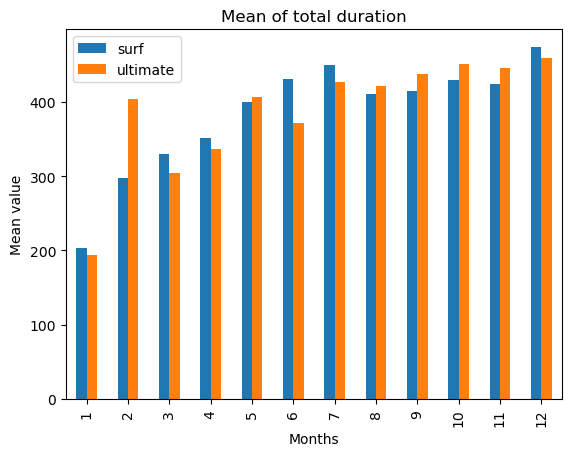

In [33]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#Creo una tabla pivote a partir de la tabla maestra para obtener sólo las medias mensuales de la duración de llamadas
pivot_plan_month = master_data2.pivot_table(index=['plan','month'], values='total_duration', aggfunc='mean')
pivot_plan_month.reset_index(inplace=True)
print(pivot_plan_month)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan surf
pivot_plan_month_surf=pivot_plan_month.query('plan=="surf"')[['month','total_duration']]
pivot_plan_month_surf=pivot_plan_month_surf.drop(axis=0, index=0)
print(pivot_plan_month_surf)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan ultimate
pivot_plan_month_ultimate=pivot_plan_month.query('plan=="ultimate"')[['month','total_duration']]
pivot_plan_month_ultimate=pivot_plan_month_ultimate.drop(axis=0, index=13)
print(pivot_plan_month_ultimate)

#Combino las dos tablas que creé para poder hacer un gráfico de barras de ambos planes
pivot_plan_month_plot=pd.merge(pivot_plan_month_surf,pivot_plan_month_ultimate,how='inner',on='month')
print(pivot_plan_month_plot)
pivot_plan_month_plot.columns=['month','surf','ultimate']
pivot_plan_month_plot.set_index('month',inplace=True)
# print(pivot_plan_month_plot)
pivot_plan_month_plot.plot(kind='bar',title='Mean of total duration',xlabel='Months',ylabel='Mean value')

In [161]:
# pivot_plan_month2 = master_data2.pivot_table(index=['plan','month'], values='total_duration', aggfunc='mean')
# pivot_plan_month2.reset_index(inplace=True)
# print(pivot_plan_month2)

# test1=pivot_plan_month2[(pivot_plan_month2['plan']=='surf') & (pivot_plan_month2['month']>0)][['month','total_duration']]
# print(test1)
# test2=pivot_plan_month2[(pivot_plan_month2['plan']=='ultimate') & (pivot_plan_month2['month']>0)][['month','total_duration']]
# print(test2)
# test3=pd.merge(test1,test2,how='inner',on='month')
# test3.set_index('month',inplace=True)

# print(test3)
# # test3.columns=['surf','ultimate']
# test3.plot(kind='bar')

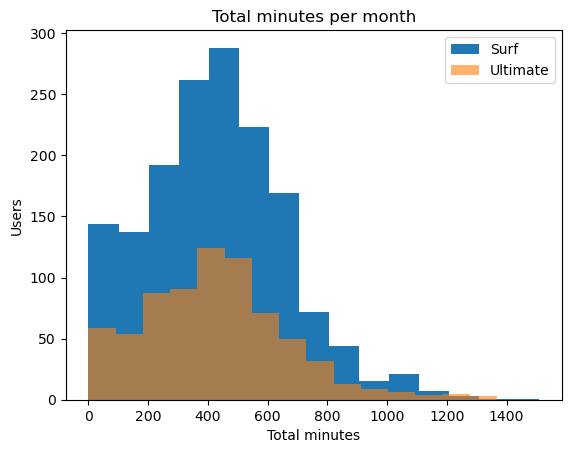

In [223]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#Filtro los datos de la tabla maestra para obtener la duración total de llamadas de todos los usuarios del plan surf y creo un histograma
master_data2[master_data2['plan']=='surf']['total_duration'].plot(kind='hist',bins=15)

#Filtro los datos de la tabla maestra para obtener la duración total de llamadas de todos los usuarios del plan ultimate y creo un histograma
master_data2[master_data2['plan']=='ultimate']['total_duration'].plot(kind='hist',bins=15,title='Total minutes per month',xlabel='Total minutes',ylabel='Users',alpha=0.6)


plt.legend(['Surf','Ultimate'])
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [230]:
# Calcula la media y la varianza de la duración mensual de llamadas.

#Creo un filtro para obtener la duración total en el plan surf
surf_filter=master_data2[master_data2['plan']=='surf']['total_duration']

#Creo un filtro para obtener la duración total en el plan ultimate
ultimate_filter=master_data2[master_data2['plan']=='ultimate']['total_duration']

#Calculo la media de ambos planes
print(f'Surf plan mean: {surf_filter.mean()}')
print(f'Ultimate plan mean: {ultimate_filter.mean()}')
print()

#Calculo la varianza de ambos planes
print(f'Surf plan variance: {np.var(surf_filter)}')
print(f'Ultimate plan variance: {np.var(ultimate_filter)}')
print()

#Calculo la desviación estándar de ambos planes
print(f'Surf plan std deviation: {np.std(surf_filter)}')
print(f'Ultimate plan std deviation: {np.std(ultimate_filter)}')

Surf plan mean: 427.12032932235593
Ultimate plan mean: 428.0718232044199

Surf plan variance: 55420.45670514803
Ultimate plan variance: 58463.01694087478

Surf plan std deviation: 235.41549801393288
Ultimate plan std deviation: 241.79126729655638


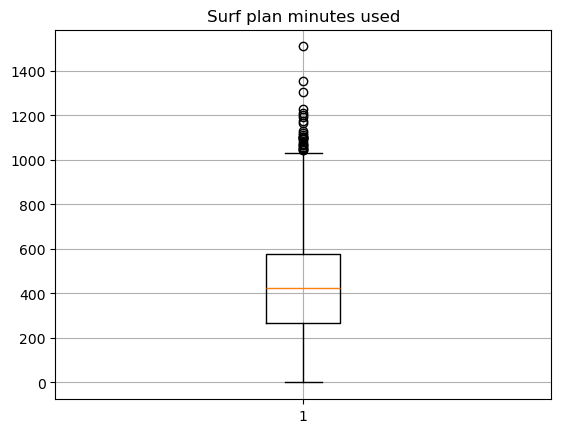

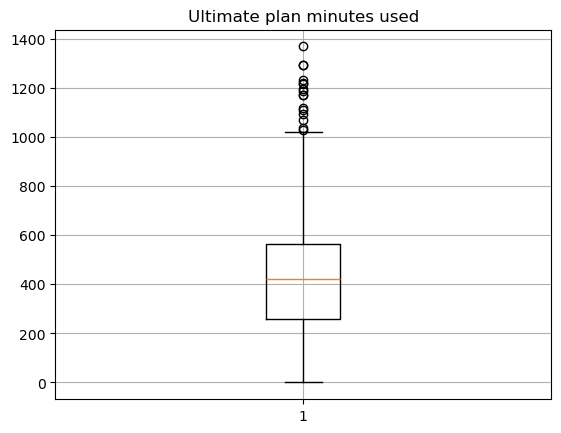

In [244]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#Habilito líneas en el gráfico, creo el boxplot a partir de los filtros del bloque anterior y muestro el gráfico
plt.grid()
ax1=plt.boxplot(surf_filter)
plt.title('Surf plan minutes used')
plt.show()

#Habilito líneas en el gráfico, creo el boxplot a partir de los filtros del bloque anterior y muestro el gráfico
plt.grid()
plt.title('Ultimate plan minutes used')
ax2=plt.boxplot(ultimate_filter)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

1. La duración media de las llamadas de los usuarios en ambos planes es muy similar, así como sus varianzas y desviaciones estándar.

### Mensajes

          surf  ultimate
month                   
1         21.0      62.0
2        108.0     151.0
3        351.0     243.0
4        870.0     463.0
5       1849.0     931.0
6       2454.0    1379.0
7       3271.0    1937.0
8       4662.0    2732.0
9       5968.0    3259.0
10      8020.0    4181.0
11      9165.0    4903.0
12     12275.0    6796.0


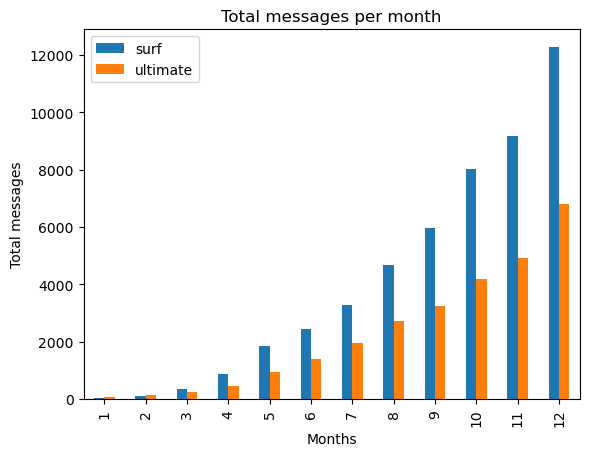

In [232]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Creo una tabla pivote a partir de la tabla maestra para obtener sólo los mensajes totales mensuales
pivot_messages_month = master_data2.pivot_table(index=['plan','month'], values='total_messages', aggfunc='sum')
pivot_messages_month.reset_index(inplace=True)
# print(pivot_messages_month)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan surf
pivot_messages_month_surf=pivot_messages_month.query('plan=="surf"')[['month','total_messages']]
pivot_messages_month_surf=pivot_messages_month_surf.drop(axis=0, index=0)
# print(pivot_messages_month_surf)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan ultimate
pivot_messages_month_ultimate=pivot_messages_month.query('plan=="ultimate"')[['month','total_messages']]
pivot_messages_month_ultimate=pivot_messages_month_ultimate.drop(axis=0, index=13)
# print(pivot_messages_month_ultimate)

#Combino las dos tablas que creé para poder hacer un gráfico de barras de ambos planes
pivot_messages_month_plot=pd.merge(pivot_messages_month_surf,pivot_messages_month_ultimate,how='inner',on='month')
# print(pivot_messages_month_plot)
pivot_messages_month_plot.columns=['month','surf','ultimate']
pivot_messages_month_plot.set_index('month',inplace=True)
print(pivot_messages_month_plot)
pivot_messages_month_plot.plot(kind='bar',title='Total messages per month',xlabel='Months',ylabel='Total messages')
plt.show()

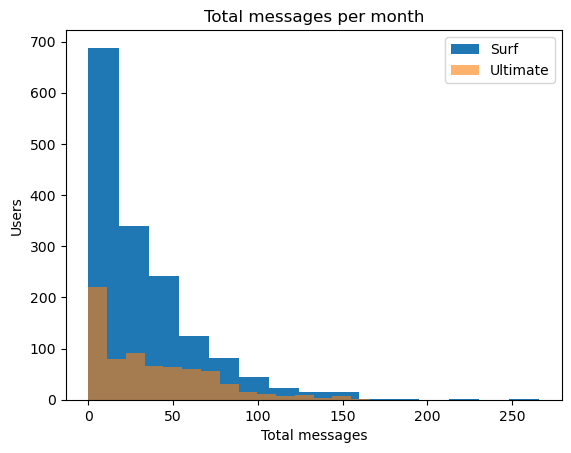

In [233]:
#Filtro los datos de la tabla maestra para obtener el número total de mensajes de todos los usuarios del plan surf y creo un histograma
master_data2[master_data2['plan']=='surf']['total_messages'].plot(kind='hist',bins=15)

#Filtro los datos de la tabla maestra para obtener el número total de mensajes de todos los usuarios del plan ultimate y creo un histograma
master_data2[master_data2['plan']=='ultimate']['total_messages'].plot(kind='hist',bins=15,title='Total messages per month',xlabel='Total messages',ylabel='Users',alpha=0.6)
plt.legend(['Surf','Ultimate'])
plt.show()

Surf plan mean: 31.041165294490185
Ultimate plan mean: 37.3439226519337

Surf plan variance: 1125.4048918656447
Ultimate plan variance: 1208.156579087935

Surf plan std deviation: 33.547054891087605
Ultimate plan std deviation: 34.758546849486315


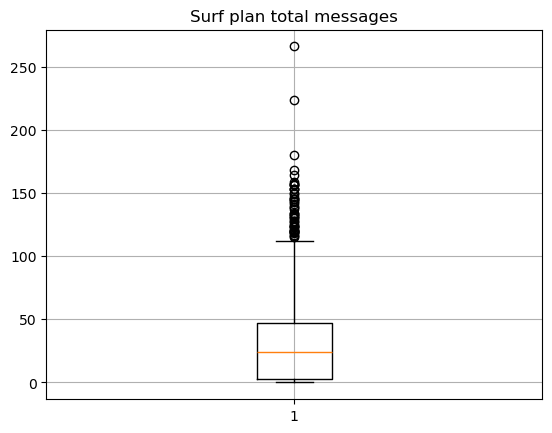

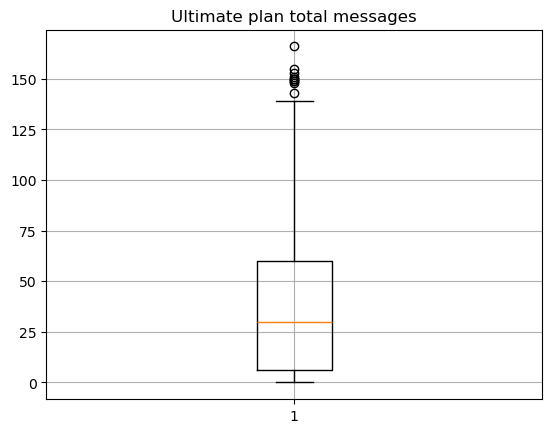

In [246]:
#Creo un filtro para obtener los mensajes totales en el plan surf
surf_filter_messages=master_data2[master_data2['plan']=='surf']['total_messages']

#Creo un filtro para obtener los mensajes totales en el plan ultimate
ultimate_filter_messages=master_data2[master_data2['plan']=='ultimate']['total_messages']

#Calculo la media de ambos planes
print(f'Surf plan mean: {surf_filter_messages.mean()}')
print(f'Ultimate plan mean: {ultimate_filter_messages.mean()}')
print()

#Calculo la varianza de ambos planes
print(f'Surf plan variance: {np.var(surf_filter_messages)}')
print(f'Ultimate plan variance: {np.var(ultimate_filter_messages)}')
print()

#Calculo la desviación estándar de ambos planes
print(f'Surf plan std deviation: {np.std(surf_filter_messages)}')
print(f'Ultimate plan std deviation: {np.std(ultimate_filter_messages)}')

plt.grid()
messages1=plt.boxplot(surf_filter_messages)
plt.title('Surf plan total messages')
plt.show()

plt.grid()
plt.title('Ultimate plan total messages')
messages2=plt.boxplot(ultimate_filter_messages)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

1. Nuevamente, las medias y desviaciones estándar entre ambos planes son similares
2. El plan surf muestra un consumo mayor de mensajes a partir del mes de marzo.
3. El plan surf también muestra muchos más valores atípicos.

### Internet

         surf  ultimate
month                  
1        10.0      29.0
2       110.0     121.0
3       312.0     221.0
4       611.0     343.0
5      1087.0     489.0
6      1502.0     725.0
7      2042.0     973.0
8      2735.0    1267.0
9      3238.0    1463.0
10     4126.0    1878.0
11     4650.0    2174.0
12     5800.0    2778.0


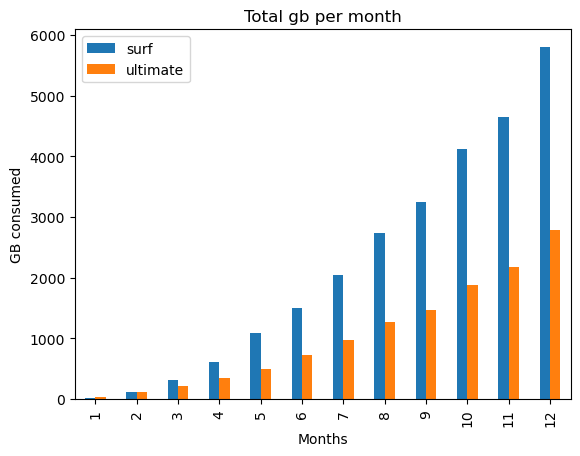

In [238]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

#Creo una tabla pivote a partir de la tabla maestra para obtener sólo el total de gb mensuales consumidos
pivot_internet_month = master_data2.pivot_table(index=['plan','month'], values='gb_used', aggfunc='sum')
pivot_internet_month.reset_index(inplace=True)
# print(pivot_internet_month)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan surf
pivot_internet_month_surf=pivot_internet_month.query('plan=="surf"')[['month','gb_used']]
pivot_internet_month_surf=pivot_internet_month_surf.drop(axis=0, index=0)
# print(pivot_internet_month_surf)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan ultimate
pivot_internet_month_ultimate=pivot_internet_month.query('plan=="ultimate"')[['month','gb_used']]
pivot_internet_month_ultimate=pivot_internet_month_ultimate.drop(axis=0, index=13)
# print(pivot_internet_month_ultimate)

#Combino las dos tablas que creé para poder hacer un gráfico de barras de ambos planes
pivot_internet_month_plot=pd.merge(pivot_internet_month_surf,pivot_internet_month_ultimate,how='inner',on='month')
pivot_internet_month_plot.columns=['month','surf','ultimate']
pivot_internet_month_plot.set_index('month',inplace=True)
print(pivot_internet_month_plot)
pivot_internet_month_plot.plot(kind='bar',title='Total gb per month',xlabel='Months',ylabel='GB consumed')
plt.show()

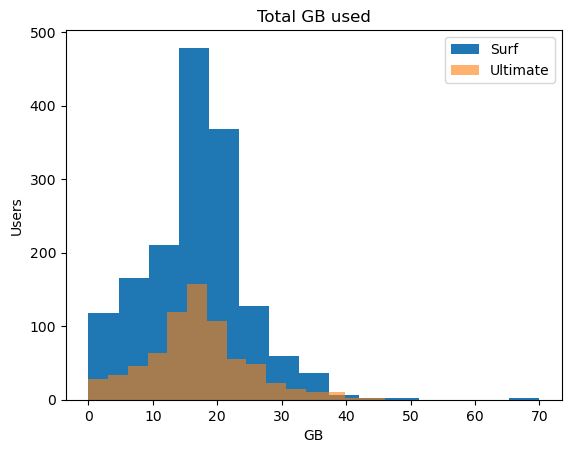

In [239]:
#Filtro los datos de la tabla maestra para obtener el total de GB consumidos de todos los usuarios del plan surf y creo un histograma
master_data2[master_data2['plan']=='surf']['gb_used'].plot(kind='hist',bins=15)

#Filtro los datos de la tabla maestra para obtener el total de GB consumidos de todos los usuarios del plan ultimate y creo un histograma
master_data2[master_data2['plan']=='ultimate']['gb_used'].plot(kind='hist',bins=15,alpha=0.6,title='Total GB used',xlabel='GB',ylabel='Users')
plt.legend(['Surf','Ultimate'])
plt.show()

Surf plan mean: 16.60734642178594
Ultimate plan mean: 17.21132596685083

Surf plan variance: 62.36260594142328
Ultimate plan variance: 60.06998221971225

Surf plan std deviation: 7.8969998063456535
Ultimate plan std deviation: 7.750482708819642


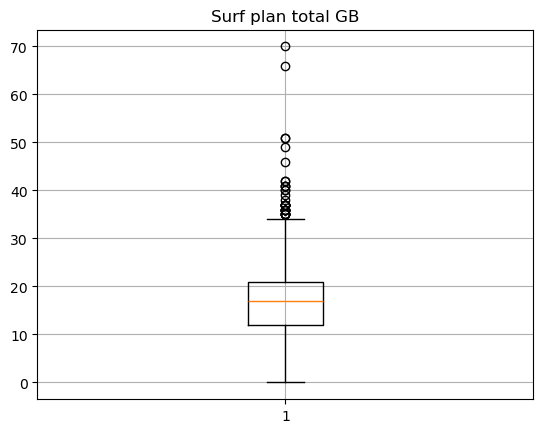

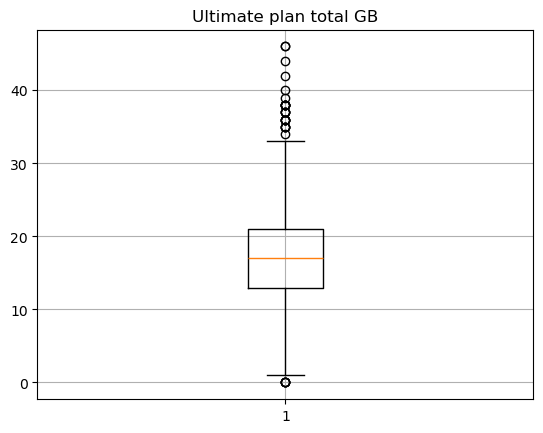

In [247]:
#Creo un filtro para obtener los GB consumidos en el plan surf
surf_filter_internet=master_data2[master_data2['plan']=='surf']['gb_used']

#Creo un filtro para obtener los GB consumidos en el plan ultimate
ultimate_filter_internet=master_data2[master_data2['plan']=='ultimate']['gb_used']

#Calculo la media de ambos planes
print(f'Surf plan mean: {surf_filter_internet.mean()}')
print(f'Ultimate plan mean: {ultimate_filter_internet.mean()}')
print()

#Calculo la varianza de ambos planes
print(f'Surf plan variance: {np.var(surf_filter_internet)}')
print(f'Ultimate plan variance: {np.var(ultimate_filter_internet)}')
print()

#Calculo la desviación estándar de ambos planes
print(f'Surf plan std deviation: {np.std(surf_filter_internet)}')
print(f'Ultimate plan std deviation: {np.std(ultimate_filter_internet)}')

plt.grid()
internet1=plt.boxplot(surf_filter_internet)
plt.title('Surf plan total GB')
plt.show()

plt.grid()
plt.title('Ultimate plan total GB')
internet2=plt.boxplot(ultimate_filter_internet)
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

1. Nuevamente, las medias y desviaciones estándar entre ambos planes son similares
2. El plan surf muestra un consumo mayor de internet a partir del mes de marzo.
3. El plan surf también muestra muchos más valores atípicos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

           surf  ultimate
month                    
0        120.00     280.0
1         40.00     280.0
2        309.57     490.0
3       1056.65     896.0
4       2035.53    1533.0
5       3667.37    2051.0
6       4779.80    3367.0
7       7583.56    4242.0
8      10356.85    5173.0
9      11304.67    6195.0
10     15504.83    7665.0
11     16415.21    9107.0
12     22437.14   11067.0


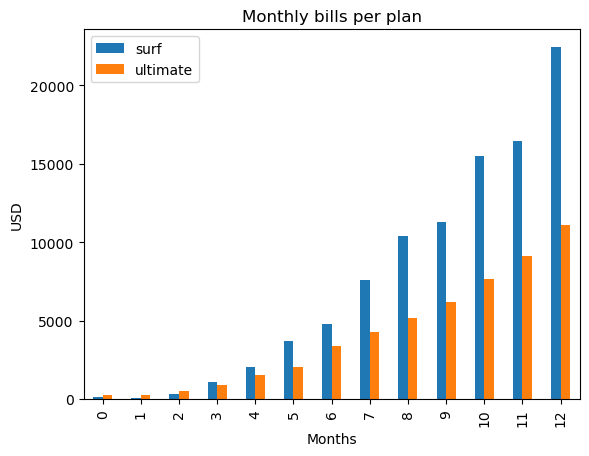

In [250]:
#Creo una tabla pivote a partir de la tabla maestra para obtener sólo la suma de las facturas mensuales
pivot_monthly_bill = master_data2.pivot_table(index=['plan','month'], values='monthly_bill', aggfunc='sum')
pivot_monthly_bill.reset_index(inplace=True)
# print(pivot_monthly_bill)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan surf
pivot_monthly_bill_surf=pivot_monthly_bill.query('plan=="surf"')[['month','monthly_bill']]
pivot_monthly_bill_surf=pivot_monthly_bill_surf
# print(pivot_monthly_bill_surf)

#Uso la tabla pivote y obtengo una tabla nueva que contiene sólo los datos para plan ultimate
pivot_monthly_bill_ultimate=pivot_monthly_bill.query('plan=="ultimate"')[['month','monthly_bill']]
pivot_monthly_bill_ultimate=pivot_monthly_bill_ultimate
# print(pivot_monthly_bill_ultimate)

#Combino las dos tablas que creé para poder hacer un gráfico de barras de ambos planes
pivot_monthly_bill_plot=pd.merge(pivot_monthly_bill_surf,pivot_monthly_bill_ultimate,how='inner',on='month')
pivot_monthly_bill_plot.columns=['month','surf','ultimate']
pivot_monthly_bill_plot.set_index('month',inplace=True)
print(pivot_monthly_bill_plot)
pivot_monthly_bill_plot.plot(kind='bar',title='Monthly bills per plan',xlabel='Months',ylabel='USD')
plt.show()

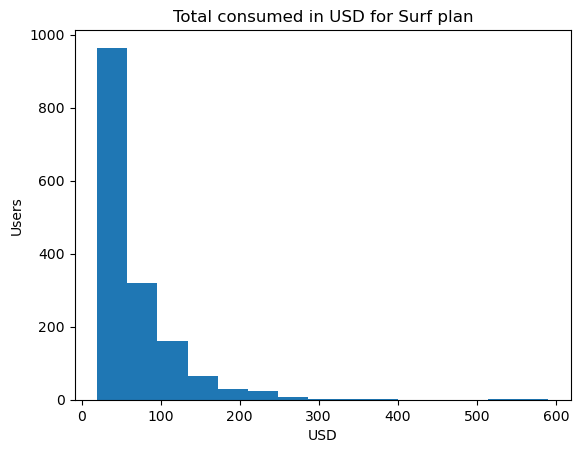

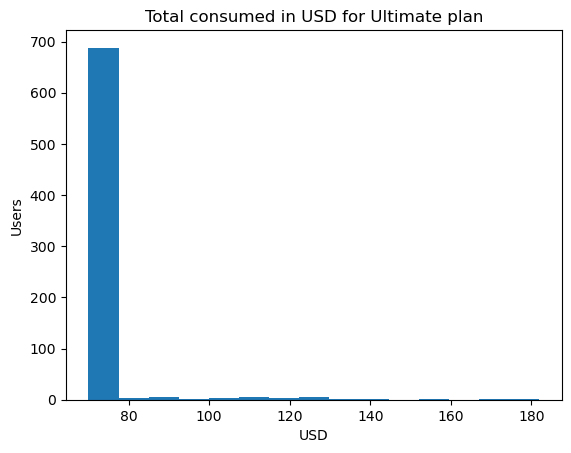

In [253]:
#Filtro los datos de la tabla maestra para obtener las facturas mensuales para el plan surf y creo un histograma
master_data2[master_data2['plan']=='surf']['monthly_bill'].plot(kind='hist',bins=15,title='Total consumed in USD for Surf plan',xlabel='USD',ylabel='Users')
plt.show()
#Filtro los datos de la tabla maestra para obtener las facturas mensuales para el plan ultimate y creo un histograma
master_data2[master_data2['plan']=='ultimate']['monthly_bill'].plot(kind='hist',bins=15,title='Total consumed in USD for Ultimate plan',xlabel='USD',ylabel='Users')
plt.show()

Surf plan monthly bill: 60.551728942368584
Ultimate plan monthly bill: 72.3011049723757

Surf plan variance: 3060.5073785813947
Ultimate plan variance: 128.98115900002801

Surf plan std deviation: 55.32185263149992
Ultimate plan std deviation: 11.356987232537863


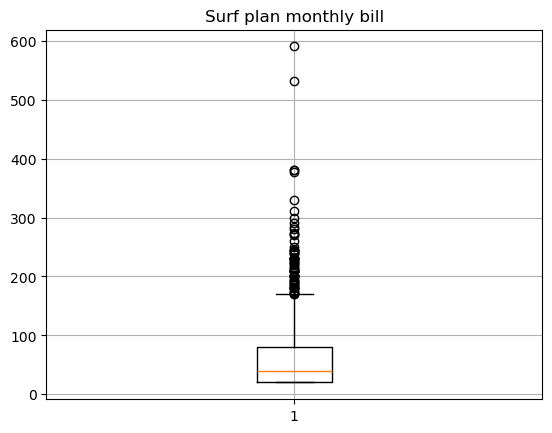

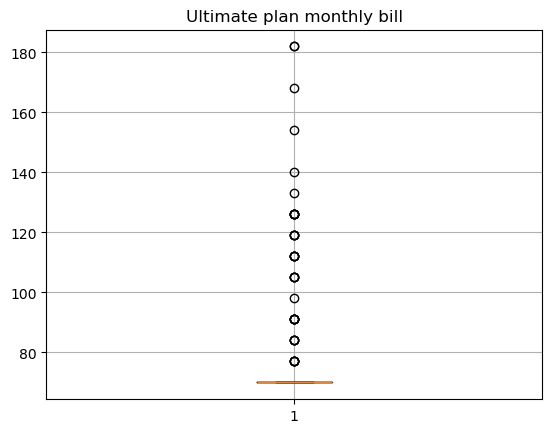

In [254]:
#Creo un filtro para obtener las facturas mensuales del plan surf
surf_monthly_bill=master_data2[master_data2['plan']=='surf']['monthly_bill']

#Creo un filtro para obtener las facturas mensuales del plan ultimate
ultimate_monthly_bill=master_data2[master_data2['plan']=='ultimate']['monthly_bill']

#Calculo la media de ambos planes
print(f'Surf plan monthly bill: {surf_monthly_bill.mean()}')
print(f'Ultimate plan monthly bill: {ultimate_monthly_bill.mean()}')
print()

#Calculo la varianza de ambos planes
print(f'Surf plan variance: {np.var(surf_monthly_bill)}')
print(f'Ultimate plan variance: {np.var(ultimate_monthly_bill)}')
print()

#Calculo la desviación estándar de ambos planes
print(f'Surf plan std deviation: {np.std(surf_monthly_bill)}')
print(f'Ultimate plan std deviation: {np.std(ultimate_monthly_bill)}')

plt.grid()
internet1=plt.boxplot(surf_monthly_bill)
plt.title('Surf plan monthly bill')
plt.show()
plt.grid()
internet2=plt.boxplot(ultimate_monthly_bill)
plt.title('Ultimate plan monthly bill')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

1. La tendencia es similar que en los análsis individuales para llamadas, mensajes e internet. El plan surf muestra un ingreso mayor que el plan ultimate.
2. A pesar de que las medias son similares, las desviaciones estándar muestran que para el plan surf, en general los consumos atípicos son muy superiores a los consumos atípicos del plan ultimate.
3. El plan ultimate factura alrededor de 70 dólares para la gran mayoría de sus usuarios.
4. EL plan surf tiene más usuarios con gastos superiores a la factura regular de 20 dólares.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

+ Hipótesis nula: Los ingresos promedio provenientes de los planes surf y ultimate son iguales.
+ Hipótesis aternativa: Los ingresos promedio provenientes de los planes surf y ultimate NO son iguales.
+ Prueba estadística. Ttest con alfa 5%

In [207]:
# Prueba las hipótesis
alpha = 0.05
test = st.ttest_ind(surf_monthly_bill,ultimate_monthly_bill,False)
pvalue = test.pvalue 
print(pvalue)
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Los ingresos promedio NO son iguales.")
else:
    print("No se puede rechazar la hipótesis nula.")

1.724423314124219e-08
Se rechaza la hipótesis nula. Los ingresos promedio NO son iguales.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

+ Hipótesis nula: Los ingresos promedio provenientes de la región NY-NJ son iguales a los provenientes de los usuarios de otras regiones.
+ Hipótesis aternativa: Los ingresos promedio provenientes de la región NY-NJ NO son iguales a los provenientes de los usuarios de otras regiones.
+ Prueba estadística. Ttest con alfa 5%

In [256]:
# Prueba las hipótesis
NYNJ_monthly_bill=master_data2[master_data2['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_bill']
all_others_monthly_bill=master_data2[master_data2['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_bill']
# print(NYNJ_monthly_bill)
# print(all_others_monthly_bill)
alpha = 0.05
test2 = st.ttest_ind(NYNJ_monthly_bill,all_others_monthly_bill,False)
pvalue = test2.pvalue 
print(pvalue)
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Los ingresos de NY-NJ NO son iguales a los de otras regiones.")
else:
    print("No se puede rechazar la hipótesis nula.")

0.04974528277407551
Se rechaza la hipótesis nula. Los ingresos de NY-NJ NO son iguales a los de otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. El diccionario de datos proporciona información importante acerca de las tablas que se usarán durante el análisis.
2. Los datos en las tablas venían sin grandes problemas. Tuve que cambiar algunos tipos de datos y rellenar valores ausentes.
3. En las secciones para enriqueces datos, creé columnas para segmentar fechas, aunque sólo utilicé las columnas de meses. 
4. Crear funciones para hacer procesos repetitivos es muy útil aunque sólo creé una para mostrar resumen de estadísticas de las tablas.
5. Hay que tener cuidado al momento de hacer los redondeos según lo indicado en el diccionario de datos.
6. Para evitar romper mis tablas limpias, decidí hacer copias de algunas y hacer sobre ellas las transformaciones que necesitaba.
7. A pesar de que las gráficas de distribución individuales para llamadas, mensajes e internet, mostraban promedios y desviaciones estándar similares, las pruebas T mostraron que sí existe diferencia significativa en el consumo de ambos planes.